In [8]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
y_true = [3, -0.5, 2, 7]
y_pred = [3, 0.0, 2, 8]
a1=explained_variance_score(y_true,y_pred)
print(a1)
a4=r2_score(y_true,y_pred)
print(a4)
a2=mean_absolute_error(y_true,y_pred)
print(a2)
a3=mean_squared_error(y_true,y_pred)
print(a3)


0.976445396146
0.957173447537
0.375
0.3125


### [:,np.newaxis] equals to reshape(-1,1), where 1 is the number of cols in the matrix
alpha越接近0， coef的震荡就越大，就类似lr 的效果
Ridge is suitable for ill conditioned matrix, where some of the values are noises, eccentric to the mean values. 
Ridge is useful to shrink less important features..通过对coef的惩罚减少不重要的特征值的影响，适合分析具有多个特征值的预测

(0.025118864315095822,
 3.9810717055349695e-11,
 -198.10224767061808,
 296.50520877210374)

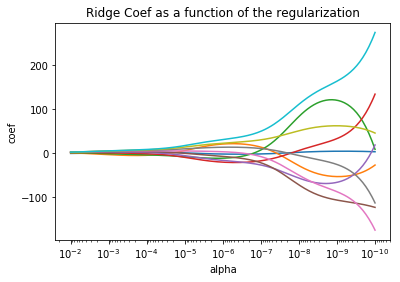

In [37]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

a1=np.arange(1,11)
a2=np.arange(0,10).reshape(-1,1)
#a2=np.arange(0,10).[:,np.newaxis]
X=1/(a1+a2)
y=np.ones(10)
n_alphas=200
alphas=np.logspace(-10,-2,n_alphas)
coefs=[]
for a in alphas:
    pre=linear_model.Ridge(alpha=a,fit_intercept=False)
    pre.fit(X,y)
    coefs.append(pre.coef_)
ax=plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel("alpha")
plt.ylabel("coef")
plt.title("Ridge Coef as a function of the regularization")
plt.axis("tight")

### RidgeCV, specify a list of alpha values, RidgeCV can calculate and choose the best alpha value. 

In [48]:
print(X.shape,y.shape)
pre=linear_model.RidgeCV(alphas=[0.0021,0.1,1],normalize=True,store_cv_values=True)
pre.fit(X,y)
pre.alpha_,pre.coef_

(10, 10) (10,)


(0.0020999999999999999,
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]))

### lasso 适合具有噪音的稀疏矩阵, Elastic-net is useful when there are multiple features which are correlated with one another

(50, 200)
(50,)
Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
0.385982415272
0.24049842942
(200,)


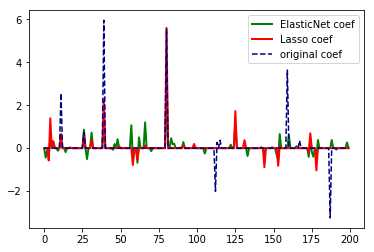

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

np.random.seed(42)
n_samples,n_features=50,200
X=np.random.randn(n_samples, n_features)
coef=3*np.random.randn(n_features)
inds=np.arange(n_features)
np.random.shuffle(inds)
coef[inds[10:]]=0
y=np.dot(X,coef)
y+=0.01*np.random.normal(size=n_samples)
print(X.shape)
print(y.shape)
n_samples=X.shape[0]
X_train, y_train = X[:n_samples // 2], y[:n_samples // 2]
X_test, y_test = X[n_samples // 2:], y[n_samples // 2:]
alpha=0.1
lasso=Lasso(alpha=alpha)
y_pred_lasso=lasso.fit(X_train,y_train).predict(X_test)
r2_lasso=r2_score(y_test,y_pred_lasso)
print(lasso)
print(r2_lasso)

en=ElasticNet(alpha=alpha,l1_ratio=0.7)
y_pred_en=en.fit(X_train,y_train).predict(X_test)
r2_en=r2_score(y_test,y_pred_en)
print(r2_en)
print(en.coef_.shape)
plt.plot(en.coef_,color="green",linewidth=2,label="ElasticNet coef")
plt.plot(lasso.coef_,color="red",linewidth=2,label="Lasso coef")
plt.plot(coef,"--",color="navy",label="original coef")
plt.legend(loc="best")



### compare coef of different models.
LinearRegression, Ridge, RidgeCV, Lasso, MultiTaskLasso, ElasticNet, MultiTaskElasticNet

(1000, 40) (1000, 20) (40, 20)
R2 score of LinearRegression 1.0
socore of lr: 1.0
CV Score of lr: [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
R2 score of MultiTaskLasso 0.952021356303
socore of mtlasso: 0.964579250496
CV Score of mtlasso: [ 0.95869743  0.96176486  0.96108238  0.96009505  0.96051884  0.95898616
  0.96134775  0.95930429  0.96038611  0.95984767]
R2 score of Ridge 0.999998506235
score of ridge: 0.99999860549
R2 score of RidgeCV 0.999998506235
socore of rcv: 0.99999860549
R2 score of ElasticNet 0.686105075028
socore of en: 0.686726182019
R2 score of MultiTaskElasticNet 0.844972611093
socore of mten: 0.87496537403


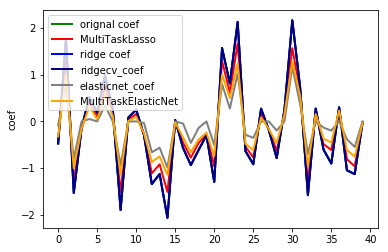

In [286]:
%matplotlib inline

from sklearn.linear_model import LinearRegression,Lasso,MultiTaskLasso,Ridge,RidgeCV,MultiTaskElasticNet,ElasticNet
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn import svm
from sklearn.model_selection import cross_val_score
select_col=0
lw=2
##基于相关系数矩阵，建立Y矩阵
n_sample,n_features,n_tasks=1000,40,20
np.random.seed(42)
X=np.random.randn(n_sample,n_features)
coef=np.random.randn(n_features,n_tasks)
Y=np.dot(X,coef)
print(X.shape,Y.shape,coef.shape)

alpha=0.8
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

lr=LinearRegression()
pre=lr.fit(X_train,Y_train[:,select_col])
coef_lr=pre.coef_
y_pred=pre.predict(X_test)
r2_lr=r2_score(Y_test[:,select_col],y_pred)
print("R2 score of LinearRegression",r2_lr)

score_lr=lr.score(X_train,Y_train[:,select_col])
print("socore of lr:",score_lr)
score_cv_lr=cross_val_score(lr,X_train,Y_train[:,select_col],cv=10)
print("CV Score of lr:",score_cv_lr)

mtlasso=MultiTaskLasso(alpha=alpha)
pre=mtlasso.fit(X_train,Y_train)
coef_mtl=pre.coef_
y_pred=pre.predict(X_test)
r2_mtl=r2_score(Y_test[:,select_col],y_pred[:,select_col])
print("R2 score of MultiTaskLasso",r2_mtl)
score_mtlasso=mtlasso.score(X_train,Y_train)
print("socore of mtlasso:",score_mtlasso)
score_cv_mtlasso=cross_val_score(mtlasso,X_train,Y_train,cv=10)
print("CV Score of mtlasso:",score_cv_mtlasso)

ridge=Ridge(alpha=alpha)
pre=ridge.fit(X_train,Y_train[:,select_col])
coef_r=pre.coef_
y_pred=pre.predict(X_test)
r2_r=r2_score(Y_test[:,select_col],y_pred)
print("R2 score of Ridge",r2_r)
score_r=ridge.score(X_train,Y_train[:,select_col])
print("score of ridge:",score_r)

rcv=RidgeCV(alphas=(alpha,100))
pre=rcv.fit(X_train,Y_train[:,select_col])
coef_rcv=pre.coef_
y_pred=pre.predict(X_test)
r2_rcv=r2_score(Y_test[:,select_col],y_pred)
print("R2 score of RidgeCV",r2_rcv)
score_rcv=rcv.score(X_train,Y_train[:,select_col])
print("socore of rcv:",score_rcv)

en=ElasticNet(alpha=alpha)
pre=en.fit(X_train,Y_train[:,select_col])
coef_en=pre.coef_
y_pred=pre.predict(X_test)
r2_en=r2_score(Y_test[:,select_col],y_pred)
print("R2 score of ElasticNet",r2_en)
score_en=en.score(X_train,Y_train[:,select_col])
print("socore of en:",score_en)

mten=MultiTaskElasticNet(alpha=alpha)
pre=mten.fit(X_train,Y_train)
coef_mten=pre.coef_
y_pred=pre.predict(X_test)
r2_mten=r2_score(Y_test[:,select_col],y_pred[:,select_col])
print("R2 score of MultiTaskElasticNet",r2_mten)
score_mten=mten.score(X_train,Y_train)
print("socore of mten:",score_mten)

#clf=svm.SVC(kernel="linear",C=1).fit(X_train,Y_train[:,select_col])
#print("score of svm",clf.score)

ax=plt.gca()
ax.plot(coef[:,select_col],label="orignal coef",color="green",linewidth=lw)
ax.plot(coef_mtl[select_col],label="MultiTaskLasso",color="red",linewidth=lw)
ax.plot(coef_r,label="ridge coef",color="blue",linewidth=lw)
ax.plot(coef_rcv,label="ridgecv_coef",color="navy",linewidth=lw)
ax.plot(coef_en,label="elasticnet_coef",color="grey",linewidth=lw)
ax.plot(coef_mten[select_col],label="MultiTaskElasticNet",color="orange",linewidth=lw)
ax.set_ylabel("coef")
plt.legend(loc="upper left")

### 构建一个稀疏矩阵，并加入噪音

(1000, 20) (1000, 3) (20, 3)
score of LinearRegression 0.999999002727
score of Lassor 0.916819169326
score of MultiTaskLasso 0.999673382019
score of Ridge 0.999998948841
score of RidgeCV 0.999998948841


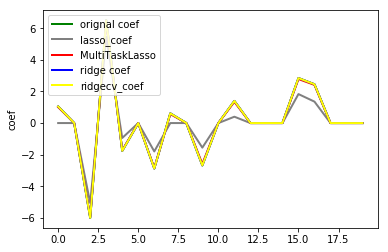

In [164]:
select_col=0
np.random.seed(42)
n_samples,n_features,n_tasks=1000,20,3
X=np.random.randn(n_samples, n_features)
coef=3*np.random.randn(n_features,n_tasks)
inds=np.arange(n_features)
np.random.shuffle(inds)
coef[inds[10:]]=0
Y=np.dot(X,coef)
for i in range(n_tasks):
    r=np.random.normal(size=n_samples)
    Y[:,i]+=0.01*r
print(X.shape,Y.shape,coef.shape)

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

lr=LinearRegression()
pre=lr.fit(X_train,Y_train[:,select_col])
coef_lr=pre.coef_
y_pred=pre.predict(X_test)
r2_lr=r2_score(Y_test[:,select_col],y_pred)
print("score of LinearRegression",r2_lr)

lr=Lasso()
pre=lr.fit(X_train,Y_train[:,select_col])
coef_ls=pre.coef_
y_pred=pre.predict(X_test)
r2_ls=r2_score(Y_test[:,select_col],y_pred)
print("score of Lassor",r2_ls)

mtlasso=MultiTaskLasso(alpha=0.1)
pre=mtlasso.fit(X_train,Y_train)
coef_mtl=pre.coef_
y_pred=pre.predict(X_test)
r2_mtl=r2_score(Y_test[:,select_col],y_pred[:,select_col])
print("score of MultiTaskLasso",r2_mtl)

ridge=Ridge(alpha=0.1)
pre=ridge.fit(X_train,Y_train[:,select_col])
coef_r=pre.coef_
y_pred=pre.predict(X_test)
r2_r=r2_score(Y_test[:,select_col],y_pred)
print("score of Ridge",r2_r)

rcv=RidgeCV(alphas=(0.1,1,100))
pre=rcv.fit(X_train,Y_train[:,select_col])
coef_rcv=pre.coef_
y_pred=pre.predict(X_test)
r2_rcv=r2_score(Y_test[:,select_col],y_pred)
print("score of RidgeCV",r2_rcv)

ax=plt.gca()
ax.plot(coef[:,select_col],label="orignal coef",color="green",linewidth=lw)
ax.plot(coef_ls,label="lasso_coef",color="grey",linewidth=lw)
ax.plot(coef_mtl[select_col],label="MultiTaskLasso",color="red",linewidth=lw)
ax.plot(coef_r,label="ridge coef",color="blue",linewidth=lw)
ax.plot(coef_rcv,label="ridgecv_coef",color="yellow",linewidth=lw)

ax.set_ylabel("coef")
plt.legend(loc="upper left")

### 创建一个sin形状的稀疏矩阵 alpha 越接近0，Ridge, lasso 等预测就越接近LR

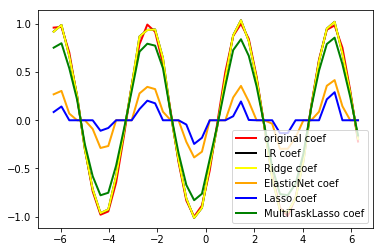

In [217]:
rng=np.random.RandomState(49)
n_samples,n_features,n_tasks=1000,60,40
n_relevant_features=20
#coef=np.zeros((n_tasks,n_features))
coef=np.zeros((n_features,n_tasks))
times=np.linspace(-2*np.pi,2*np.pi,n_tasks)
for k in range(n_relevant_features):
    coef[k]=np.sin((1+rng.randn(1))*times+3*rng.randn(1))
    #coef[k]=np.sin(times)
alpha=0.8
X=np.random.randn(n_samples,n_features)
Y=np.dot(X,coef)+rng.randn(n_samples,n_tasks)
coef_lr=np.array([LinearRegression().fit(X,y).coef_ for y in Y.T])
coef_rg=np.array([Ridge(alpha=alpha).fit(X,y).coef_ for y in Y.T])
coef_lasso=np.array([Lasso(alpha=alpha).fit(X,y).coef_ for y in Y.T])
coef_en=np.array([ElasticNet(alpha=alpha,l1_ratio=0.7).fit(X,y).coef_ for y in Y.T])
coef_mtl=MultiTaskLasso(alpha=alpha).fit(X,Y).coef_
select_feature=1
ax=plt.gca()

ax.plot(times,coef[select_feature],color="red",linewidth=2,label="original coef")
ax.plot(times,coef_lr[:,select_feature],color="black",linewidth=2,label="LR coef")
ax.plot(times,coef_rg[:,select_feature],color="yellow",linewidth=2,label="Ridge coef")
ax.plot(times,coef_en[:,select_feature],color="orange",linewidth=2,label="ElasticNet coef")
ax.plot(times,coef_lasso[:,select_feature],color="blue",linewidth=2,label="Lasso coef")
ax.plot(times,coef_mtl[:,select_feature],color="green",linewidth=2,label="MultiTaskLasso coef")

plt.legend(loc="best")


In [288]:
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split

iris=datasets.load_iris()

print(iris.data.shape,iris.target.shape)
#print(iris.data[:3],iris.target)
X_train,X_test,y_train,y_test=train_test_split(iris.data,iris.target,test_size=0.2,random_state=0)
clf=svm.SVC(kernel="linear",C=1).fit(X_train,y_train)
print("score of SVC",clf.score(X_test,y_test))
scores=cross_val_score(clf,iris.data,iris.target,cv=5,scoring="f1_macro")
print(scores,scores.mean(),scores.std()*2)

from sklearn.model_selection import ShuffleSplit
n_samples=iris.data.shape[0]
cv=ShuffleSplit(n_splits=3,test_size=0.3,random_state=0)
print(cv)
cross_val_score(clf,iris.data,iris.target,cv=cv)


(150, 4) (150,)
score of SVC 1.0
[ 0.96658312  1.          0.96658312  0.96658312  1.        ] 0.979949874687 0.0327417175309
ShuffleSplit(n_splits=3, random_state=0, test_size=0.3, train_size=None)


array([ 0.97777778,  0.97777778,  1.        ])

### Split train and test samples: KFold 

In [621]:
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
X=list("abcd")
kf=KFold(n_splits=2)
X=np.array([[0,0],[1,1],[-1,-1],[2,2]])
y=np.array([0,1,0,1])
for train,test in kf.split(X):
    print("train and test:",train,test)
    print(iris.data[train],iris.target[train])
    print(X[train],y[train])
X=list("abcdefghigk")
kf=KFold(n_splits=2)
print("KFold:")
for train,test in kf.split(X):
    print(train,test)
rkf=RepeatedKFold(n_splits=2,n_repeats=2,random_state=42)
print("RepeatedKFold:")
for train, test in rkf.split(X):
    print(train,test)
loo=LeaveOneOut()
print("LeaveOneOut")
for train,test in loo.split(X):
    print(train,test)
lpo=LeavePOut(p=2)
print("LeavePOut")
for train,test in lpo.split(X):
    print(train,test)

train and test: [2 3] [0 1]
[[ 0.08529891  0.05068012  0.04445121 -0.00567061 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286377 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665645  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02269202 -0.00936191]] [ 141.  206.]
[[-1 -1]
 [ 2  2]] [0 1]
train and test: [0 1] [2 3]
[[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]] [ 151.   75.]
[[0 0]
 [1 1]] [0 1]
KFold:
[ 6  7  8  9 10] [0 1 2 3 4 5]
[0 1 2 3 4 5] [ 6  7  8  9 10]
RepeatedKFold:
[3 4 6 7 8] [ 0  1  2  5  9 10]
[ 0  1  2  5  9 10] [3 4 6 7 8]
[ 2  3  4  7 10] [0 1 5 6 8 9]
[0 1 5 6 8 9] [ 2  3  4  7 10]
LeaveOneOut
[ 1  2  3  4  5  6  7  8  9 10] [0]
[ 0  2  3  4  5  6  7  8  9 10] [1]
[ 0  1  3  4  5  6  7  8  9 10] [2]
[ 0  1  2  4  5  6  7  8  9 10] [3]
[ 

In [314]:
from sklearn import metrics
metrics.SCORERS

{'accuracy': make_scorer(accuracy_score),
 'adjusted_mutual_info_score': make_scorer(adjusted_mutual_info_score),
 'adjusted_rand_score': make_scorer(adjusted_rand_score),
 'average_precision': make_scorer(average_precision_score, needs_threshold=True),
 'completeness_score': make_scorer(completeness_score),
 'explained_variance': make_scorer(explained_variance_score),
 'f1': make_scorer(f1_score),
 'f1_macro': make_scorer(f1_score, average=macro, pos_label=None),
 'f1_micro': make_scorer(f1_score, average=micro, pos_label=None),
 'f1_samples': make_scorer(f1_score, average=samples, pos_label=None),
 'f1_weighted': make_scorer(f1_score, average=weighted, pos_label=None),
 'fowlkes_mallows_score': make_scorer(fowlkes_mallows_score),
 'homogeneity_score': make_scorer(homogeneity_score),
 'log_loss': make_scorer(log_loss, greater_is_better=False, needs_proba=True),
 'mean_absolute_error': make_scorer(mean_absolute_error, greater_is_better=False),
 'mean_squared_error': make_scorer(mean_sq

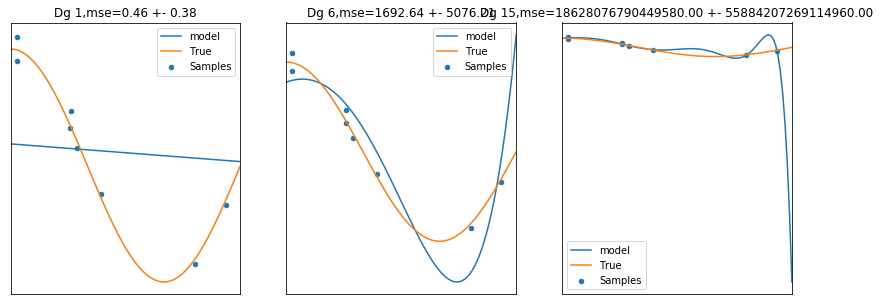

In [341]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.cos(1.5*np.pi*X)
np.random.seed(45)
n_samples=20
degrees=[1,6,15]
X=np.sort(np.random.randn(n_samples))
y=true_fun(X)+np.random.randn(n_samples)*0.1

plt.figure(figsize=(14,5))
for i in range(len(degrees)):
    ax=plt.subplot(1,len(degrees),i+1)
    plt.setp(ax,xticks=(),yticks=())
    polynomial_features=PolynomialFeatures(degree=degrees[i],include_bias=False)
    lr=LinearRegression()
    pipeline=Pipeline([("p_features",polynomial_features),("linear_regression",lr)])
    pipeline.fit(X.reshape(-1,1),y)
    scores=cross_val_score(pipeline,X.reshape(-1,1),y,cv=10,scoring="neg_mean_squared_error")
    X_test=np.linspace(0,1,100)
    plt.plot(X_test,pipeline.predict(X_test.reshape(-1,1)),label="model")
    plt.plot(X_test,true_fun(X_test),label="True")
    plt.scatter(X,y,s=20,label="Samples")
    plt.xlim((0,1))
    plt.legend(loc="best")
    plt.title("Dg %d,mse=%.2f +- %.2f"%(degrees[i],-scores.mean(),scores.std()))

### alpha=0, Ridge等同于LinearRegression, 当l1_ratio=1, ElasticNet等同Lasso

(442, 10) (442,)
score lr: 0.482318122111
score Ridge: 0.477502706927
score lasso: 0.472630951715
score ElasticNet: 0.191295184985
score Lars: -0.0962177533336
score RidgeCV: 0.480375080275
alpha= 0.1


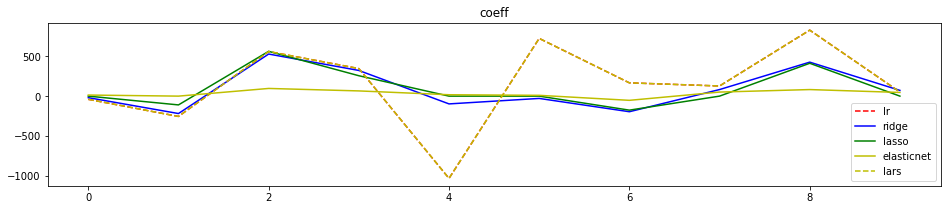

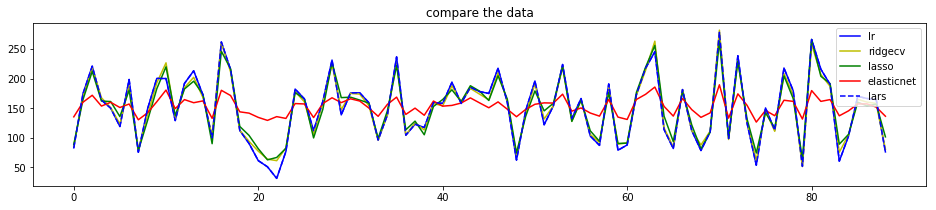

In [442]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge,RidgeCV,ElasticNet,Lasso,Lars
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import r2_score
diab=datasets.load_diabetes()
X=diab.data
y=diab.target
print(X.shape,y.shape)
lr=LinearRegression(normalize=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)
lm=lr.fit(X_train,y_train)
cv=KFold(n_splits=5,random_state=20)
score=cross_val_score(lr,X,y,scoring="r2",cv=cv)
print("score lr:",score.mean())




ridge=Ridge(alpha=0.2,normalize=True)
rig=ridge.fit(X_train,y_train)
score=cross_val_score(ridge,X,y,scoring="r2",cv=cv)
print("score Ridge:",score.mean())

lasso=Lasso(alpha=0.2,normalize=True)
las=lasso.fit(X_train,y_train)
score=cross_val_score(lasso,X,y,scoring="r2",cv=cv)
print("score lasso:",score.mean())

eln=ElasticNet(alpha=0.2,normalize=True,l1_ratio=0.9)
en=eln.fit(X_train,y_train)
score=cross_val_score(eln,X,y,scoring="r2",cv=cv)
print("score ElasticNet:",score.mean())

lars=Lars(normalize=True)
lar=lars.fit(X_train,y_train)
score=cross_val_score(lars,X,y,scoring="r2",cv=cv)
print("score Lars:",score.mean())


rcv=RidgeCV(alphas=[0.1,0.2,0.5,0.7,0.8,1],normalize=True,scoring="r2")
rig=rcv.fit(X_train,y_train)
score=cross_val_score(rcv,X,y,scoring="r2",cv=cv)
print("score RidgeCV:",score.mean())
print("alpha=",rcv.alpha_)

fig=plt.figure(figsize=(16,3))
plt.plot(lm.coef_,"r--",label="lr")
plt.plot(rig.coef_,"b-",label="ridge")
plt.plot(las.coef_,"g-",label="lasso")
plt.plot(en.coef_,"y-",label="elasticnet")
plt.plot(lar.coef_,"y--",label="lars")
plt.title("coeff")
plt.legend(loc="best")

fig=plt.figure(figsize=(16,3))
#plt.plot(y_test,"r--",label="True")
plt.plot(lm.predict(X_test),"b-",label="lr")
plt.plot(rig.predict(X_test),"y-",label="ridgecv")
plt.plot(las.predict(X_test),"g-",label="lasso")
plt.plot(en.predict(X_test),"r-",label="elasticnet")
plt.plot(lar.predict(X_test),"b--",label="lars")
plt.title("compare the data")
plt.legend(loc="best")

### cross_val_score, compare the score of different models by cross validation, cv is to specify how to split the train and test data

In [424]:
from sklearn import datasets
from sklearn.model_selection import train_test_split,cross_val_score,KFold,LeaveOneOut,LeavePOut
from sklearn.linear_model import LinearRegression,Ridge,Lasso

diab=datasets.load_diabetes()
X=diab.data
y=diab.target
print(X.shape,y.shape)
lr=LinearRegression()
cv=KFold(n_splits=4,random_state=20)
print("exmaple of KFold in n_splits:")
for train,test in cv.split(X[:10]):
    print("train,test=",train,test)
score=cross_val_score(lr,X,y,scoring="r2",cv=cv)
print("scores for lr:",score.mean())

scores=cross_val_score(Ridge(alpha=0.5),X,y,scoring="r2",cv=cv)
print("scores for Ridge:",scores.mean())

scores=cross_val_score(Lasso(alpha=0.1),X,y,scoring="r2",cv=cv)
print("scores for Lasso:",scores.mean())

(442, 10) (442,)
exmaple of KFold in n_splits:
train,test= [3 4 5 6 7 8 9] [0 1 2]
train,test= [0 1 2 6 7 8 9] [3 4 5]
train,test= [0 1 2 3 4 5 8 9] [6 7]
train,test= [0 1 2 3 4 5 6 7] [8 9]
scores for lr: 0.484608447201
scores for Ridge: 0.447066814846
scores for Lasso: 0.480270698582


array([[ 0.54340494,  0.27836939,  0.42451759,  0.84477613,  0.00471886],
       [ 0.12156912,  0.67074908,  0.82585276,  0.13670659,  0.57509333],
       [ 0.89132195,  0.20920212,  0.18532822,  0.10837689,  0.21969749],
       [ 0.97862378,  0.81168315,  0.17194101,  0.81622475,  0.27407375],
       [ 0.43170418,  0.94002982,  0.81764938,  0.33611195,  0.17541045]])

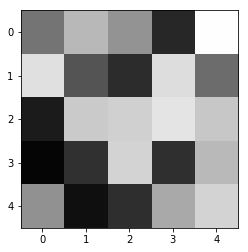

In [450]:
np.random.seed(100)
x=np.array(np.random.rand(25))
x=x.reshape(5,5)
plt.imshow(x,vmax=1,vmin=0,cmap="binary",interpolation='nearest')
x

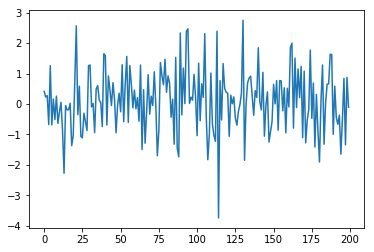

In [454]:
x=np.random.normal(size=200)
plt.plot(x)

### Robust Regression, deal with corrupt data.. insensitive to corrupt data

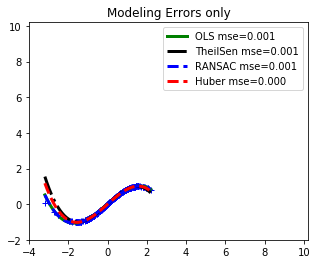

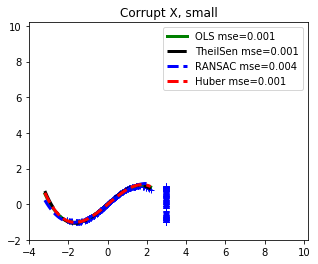

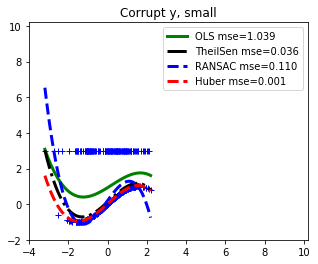

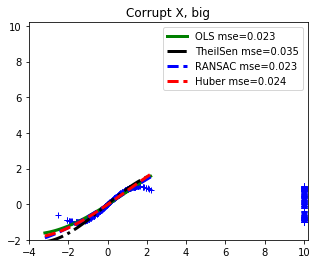

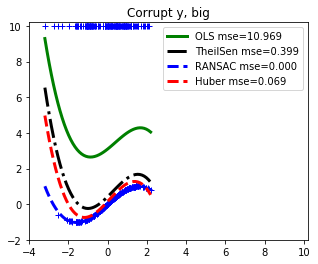

In [465]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, TheilSenRegressor, RANSACRegressor, HuberRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

np.random.seed(20)
X=np.random.normal(size=400)
y=np.sin(X)
X=X.reshape(-1,1)
X_test=np.random.normal(size=200)
y_test=np.sin(X_test)
X_test=X_test.reshape(-1,1)
y_errors=y.copy()
y_errors[::3]=3
X_errors=X.copy()
X_errors[::3]=3

y_errors_large=y.copy()
y_errors_large[::3]=10
X_errors_large=X.copy()
X_errors_large[::3]=10

estimators=[
("OLS",LinearRegression()),
("TheilSen",TheilSenRegressor(random_state=42)),
("RANSAC",RANSACRegressor(random_state=42)),
("Huber",HuberRegressor())
]
colors=dict(zip(("OLS","TheilSen","RANSAC","Huber"),("green","black","blue","red")))
linestyle=dict(zip(("OLS","TheilSen","RANSAC","Huber"),("-","-.","--","--")))
lw=3
xlim=np.linspace(X.min(),X.max())
for title ,this_X,this_y in [
    ("Modeling Errors only",X,y),
    ("Corrupt X, small",X_errors,y),
    ("Corrupt y, small",X,y_errors),
    ("Corrupt X, big",X_errors_large,y),
    ("Corrupt y, big",X,y_errors_large)]:
    plt.figure(figsize=(5,4))
    plt.title(title)
    plt.plot(this_X,this_y, 'b+')
    for name, estimator in estimators:
        model=make_pipeline(PolynomialFeatures(3),estimator)
        model.fit(this_X,this_y)
        mse=mean_squared_error(y_test,model.predict(X_test))
        ylim=model.predict(xlim.reshape(-1,1))
        plt.plot(xlim,ylim,color=colors[name],linestyle=linestyle[name],linewidth=lw,label="%s mse=%.3f"%(name,mse))
        plt.legend(loc="best")
        plt.xlim(-4,10.2)
        plt.ylim(-2,10.2)

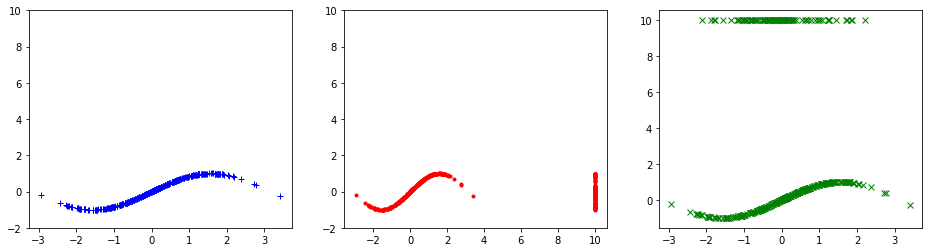

In [492]:

X=np.random.normal(size=400)
y=np.sin(X)
X_error=X.copy()
y_error=y.copy()
X_error[::4]=10
y_error[::4]=10
#X=X.reshape(-1,1)
fig=plt.figure(figsize=(16,4))

ax=plt.subplot(1,3,1)
ax.plot(X,y,"b+")
plt.ylim(-2,10)
ax=plt.subplot(1,3,2)
ax.plot(X_error,y,"r.")
plt.ylim(-2,10)
ax=plt.subplot(1,3,3)
ax.plot(X,y_error,"gx")


### for robust regression, use RANSAC if you are not sure.. suitable for samples with corrupt data, to compare different estimators(lr vs ransac), use mse(mean_squared_error) as their score might be bad in both. 

(200, 1) (200,) ()
original coef 84.46188611438505
lr coef/score/mse: [ 17.74838248] -2.02003429386 19601.73616
ransac coef/score/mse: [ 80.67344262] -1.47862299251 57.7835269186


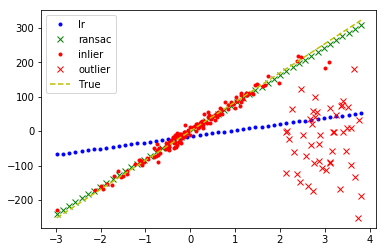

In [549]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model,datasets
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
n_samples=200
n_outliers=50
n_features=1
np.random.seed(100)
X,y,coef=datasets.make_regression(n_samples=n_samples,n_features=n_features,n_informative=1,noise=10,coef=True,random_state=10)
X[:n_outliers]=3+0.5*np.random.normal(size=(n_outliers,n_features))
y[:n_outliers]=-3+100*np.random.normal(size=n_outliers)

print(X.shape,y.shape,coef.shape)
xlim=np.linspace(X.min(),X.max())
print("original coef",coef)
#plt.plot(X,y,"r+",label="original")
ylim=xlim*coef
#print("xlim:",xlim)
#print("ylim:",ylim)
est=LinearRegression().fit(X,y)
ylim_lr=est.predict(xlim.reshape(-1,1))
score=cross_val_score(est,X,y,cv=3)
mse=mean_squared_error(ylim,ylim_lr)
print("lr coef/score/mse:",est.coef_,score.mean(),mse)
plt.plot(xlim,ylim_lr,"b.",label="lr")

est=RANSACRegressor().fit(X,y)
ylim_ransac=est.predict(xlim.reshape(-1,1))
score=cross_val_score(est,X,y,cv=3)
mse=mean_squared_error(ylim,ylim_ransac)
print("ransac coef/score/mse:",est.estimator_.coef_,score.mean(),mse)
plt.plot(xlim,ylim_ransac,"gx",label="ransac")

inlier_mask=est.inlier_mask_
outlier_mask=np.logical_not(inlier_mask)
plt.plot(X[inlier_mask],y[inlier_mask],"r.",label="inlier")
plt.plot(X[outlier_mask],y[outlier_mask],"rx",label="outlier")
plt.plot(xlim,ylim,"y--",label="True")
plt.legend(loc="best")



### the following example proves bad mse for ransac for corrupt data with multiple features, the more the features are, the worse the mse peformance is for ransac comparing to lr

In [574]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model,datasets
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
n_samples=200
n_outliers=50
n_features=3
np.random.seed(100)
X,y,coef=datasets.make_regression(n_samples=n_samples,n_features=n_features,n_informative=1,noise=20,coef=True,random_state=10)
X[:n_outliers]=3+0.5*np.random.normal(size=(n_outliers,n_features))
y[:n_outliers]=-3+10*np.random.normal(size=n_outliers)
#coef=coef.reshape(-1,1)
print(X.shape,y.shape,coef.shape)
X_test=np.random.normal(size=(n_samples,n_features))
y_test=np.dot(X_test,coef)
print(X_test.shape,y_test.shape)
est=LinearRegression().fit(X,y)
mse=mean_squared_error(y_test,est.predict(X_test))
score=cross_val_score(est,X,y,cv=3)
print("lr coef/mes/score:",est.coef_,mse,score.mean())

est=RANSACRegressor().fit(X,y)
mse=mean_squared_error(y_test,est.predict(X_test))
score=cross_val_score(est,X,y,cv=3)
print("ransac coef/mes:",est.estimator_.coef_,mse,score.mean())


(200, 3) (200,) (3,)
(200, 3) (200,)
lr coef/mes/score: [ -5.19111487  11.95325602  -4.43677785] 160.279124085 -6.48748081391
ransac coef/mes: [ -1.84631455  11.55019681  -6.18543574] 147.436863658 -2.77177144308


In [589]:
import numpy as np
from sklearn import random_projection

rng=np.random.RandomState(20)
X=rng.rand(10,2000)
X=np.array(X,dtype="float32")

transformer=random_projection.GaussianRandomProjection()
X_new=transformer.fit_transform(X)
X_new.dtype
y=rng.binomial(1,0.5,100)
y

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0])

In [597]:
from sklearn.preprocessing import LabelBinarizer
y=[6,1,2,6,4,2]
y=LabelBinarizer().fit_transform(y)
y

array([[0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 1, 0, 0]])

### 比较LR, Ridge和Lasso, 相对LR, Ridge对大的coef增加了惩罚措施，使得coef收敛，相比Ridge， Lasso的coef更收敛，而且将某些特征的coef设置为0， 本意是为了减少相关的特征量，在模型中去掉一些无关紧要的特征量。下面这个例子中，三种模型预测的score, mse差别都不大，但是特征值的coef差别很大

In [608]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import datasets
diab=datasets.load_diabetes()
X=diab.data
y=diab.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)
clf=LinearRegression(normalize=True).fit(X_train,y_train)
coef=clf.coef_
score=clf.score(X_test,y_test)
mse=mean_squared_error(y_test,clf.predict(X_test))
print("alpha/coef/socre:",coef,scores.mean(),mse)

alphas=[0.1,0.2,0.3,0.5,0.8,1,10]
clf=RidgeCV(alphas=alphas).fit(X_train,y_train)
coef=clf.coef_
score=clf.score(X_test,y_test)
mse=mean_squared_error(y_test,clf.predict(X_test))
print("alpha/coef/socre/mse:",clf.alpha_,coef,scores.mean(),mse)

clf=LassoCV(alphas=alphas).fit(X_train,y_train)
coef=clf.coef_
score=clf.score(X_test,y_test)
mse=mean_squared_error(y_test,clf.predict(X_test))
print("alpha/coef/socre/mse:",clf.alpha_,coef,scores.mean(),mse)


coef/socre: [  -40.4344303   -255.5975599    561.20624771   346.6618945  -1034.96857344
   726.22785318   167.0441535    127.47639878   830.27619811    51.23966951] 0.480270698582 3461.63574117
coef/socre: 0.1 [ -16.70805343 -212.63636198  520.37941647  318.87660321  -81.52698657
  -39.75113063 -196.89422181   87.32749769  413.26275304   75.12786803] 0.480270698582 3359.79115284
coef/socre: 0.1 [  -0.         -171.78036172  567.35839374  292.82923565  -35.48847105
   -0.         -212.17531601    0.          439.93920785   11.89284379] 0.480270698582 3423.67540516


In [619]:
X=np.array(list("abcdef"))
y=np.array_split(X,3)
a=list(y)
b=a.pop(1)
b

array(['c', 'd'],
      dtype='<U1')